<a href="https://colab.research.google.com/github/iloveleejunghyun/SpamDetection/blob/master/Email_Spam_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://appliedmachinelearning.files.wordpress.com/2017/01/spam-filter.png?w=620)



```
Spam Filtering using SVM
```



# Load Dataset

**Check the link for the dataset from Kaggle**
https://www.kaggle.com/uciml/sms-spam-collection-dataset

In [ ]:
!wget https://raw.githubusercontent.com/iloveleejunghyun/SpamDetection/master/spam.csv

--2020-12-02 15:33:05--  https://raw.githubusercontent.com/iloveleejunghyun/SpamDetection/master/spam.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/plain]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 491.86K  --.-KB/s    in 0.03s   

2020-12-02 15:33:06 (18.1 MB/s) - ‘spam.csv’ saved [503663/503663]



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = pd.read_csv('spam.csv',encoding='latin-1')

In [ ]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
data.shape
data
data = data[['v1','v2']]
data.columns = ['Category', 'Message']
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
print("We have",data.shape[0],"observations")

We have 5572 observations


In [ ]:
dis = data['Category'].value_counts()

In [ ]:
print("We have",dis[0], 'normal mails')
print("We have",dis[1], 'spam mails')

We have 4825 normal mails
We have 747 spam mails


This is our distribution in the total data

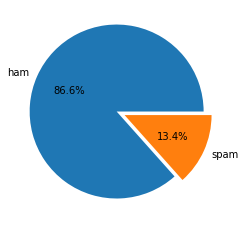

In [ ]:
plt.pie(x = dis.values, explode = (0.1,0), labels = dis.index, autopct='%1.1f%%')
plt.show()

# Label Spam as 1 and Ham as 0

### Using loc

In [ ]:
data.loc[data['Category'] == 'spam']

,Category,Message
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...


In [ ]:
data.loc[data['Category'] == 'spam']['Category']

2       spam
5       spam
8       spam
9       spam
11      spam
        ... 
5537    spam
5540    spam
5547    spam
5566    spam
5567    spam
Name: Category, Length: 747, dtype: object

In [ ]:
data.loc[data['Category'] == 'spam', 'Category'] = 1
data.loc[data['Category'] == 'ham', 'Category'] = 0
data.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### Use get_dummies

In [ ]:
pd.get_dummies(data['Category'])

,0,1
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0
...,...,...
5567,0,1
5568,1,0
5569,1,0
5570,1,0


Select whether you need the ham as 1 or spam as 1 and insert that column into the data and drop the categorical category already present in the dataframe

# Build the classic X and y
## X -> Feature y -> Label

In [ ]:
X = data['Message']
y = data['Category']

In [ ]:
print(X,'\n\n',y)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object 

 0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Category, Length: 5572, dtype: object


# Train - Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

In [ ]:
print("Entire data   :", data.shape)
print("X_train shape : ", X_train.shape)
print("y_train shape : ", y_train.shape)
print("X_test shape  : ", X_test.shape)
print("y_test shape  : ", y_test.shape)

Entire data   : (5572, 2)
X_train shape :  (4457,)
y_train shape :  (4457,)
X_test shape  :  (1115,)
y_test shape  :  (1115,)


In [ ]:
1115/5572

0.20010768126346015

0.2 % is maintained as we have given

# Feature Extraction

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

## Why use Tfidf

Classic approach is to use a bad of words 

Why we chose Tfidf

![alt text](https://miro.medium.com/max/571/1*wArU3CMFB9kqhQaZUYt-1w.png)

![alt text](https://miro.medium.com/max/462/1*WHwfRvjRyHEH5kPOom9bOg.png)

For example, there are two messages in the dataset. 

‘hello world’ and ‘hello foo bar’. 

1.TF(‘hello’) is 2. 

     Since hello appears once in the message and has hello in both of the message 2/1

2.IDF(‘hello’) is log(2/2). 

If a word occurs a lot, it means that the word gives less information. 

say irrelevant words like mail recieves a high impact so that it will be a spam, as a result of using tfidf we will have rare things like offer have high impact

![alt text](https://miro.medium.com/max/699/1*8_zBdbrnrt0VTdoCENLdNw.png)

min_df = When building the vocabulary ignore terms that have a document  
    frequency strictly lower than the given threshold. This value is also  
    called cut-off in the literature.

Stop words are words like a,an,are,etc.

In [ ]:
extractor = TfidfVectorizer(min_df = 1, stop_words = 'english', lowercase=True )

In [ ]:
X_train_features = extractor.fit_transform(X_train)
X_test_features = extractor.transform(X_test)

In [ ]:
# Convert object type to int
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Build the model

**SVM model**

![alt text](https://www.researchgate.net/publication/304611323/figure/fig8/AS:668377215406089@1536364954428/Classification-of-data-by-support-vector-machine-SVM.png)

SVM builds a classifier by searching for a separating hyperplane (optimal hyperplane) which is optimal and maximises the margin that separates the categories (in our case spam and ham). Thus, SVM has the advantage of robustness in general and effectiveness when the number of dimensions is greater than the number of samples.

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
model = LinearSVC()

In [ ]:
model.fit(X_train_features, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

# Evaluate the model

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
train_pred = model.predict(X_train_features)
print("Training accuracy : ",accuracy_score(y_train, train_pred))

Training accuracy :  0.9995512676688355


In [ ]:
test_pred = model.predict(X_test_features)
print("Test accuracy : ",accuracy_score(y_test, test_pred))

Test accuracy :  0.9802690582959641


# Checking

In [ ]:
mail = ["WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only."]

In [ ]:
processed = extractor.transform(mail)

In [ ]:
processed

<1x7456 sparse matrix of type '<class 'numpy.float64'>'
	with 16 stored elements in Compressed Sparse Row format>

In [ ]:
model.predict(processed)

array([1])

In [ ]:
mail = ["Can you guess I am a spam or ham email?. give me money"]
processed = extractor.transform(mail)
model.predict(processed)

array([0])

Your model may not give best output because it hasn't seen a lot of data.

You can implement this model using a large dataset and you will be able to build a better model

# Success